In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TODO:
- [ ] Add more visualizations (Sophie)
- [ ] Missing values          (Amir)
  - [x] backfill for 1 day
  - [x] In case of long missing values, we still have to figure out what to do 
    - Most missing values after the day baqckfilling ended up being the most obscure appCat's so I simply set them to 0
  - [-] Aggregating over Days/Hours

- [ ] Outlier detection        (Sophie)
  - [ ] Grubs/ VIF/ Cook's distance (Not all of them)

- [ ] Feature engineering     (Nabila)
  - [ ] PCA                   
    - [ ] Whitening
    


In [45]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 200,
    "savefig.format": "png",
    "savefig.transparent": True,
    "axes.grid": True,
    "grid.linewidth": 0.5,
    "grid.linestyle": "--",
    "grid.color": "0.8",
    "image.cmap": "Blues",
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
    "text.usetex": True, "mathtext.fontset": "cm",
    "pgf.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{cmbright}"
})


In [46]:
data = pd.read_csv("dataset_mood_smartphone.csv", index_col=0)
data['time'] = pd.to_datetime(data['time'])
data['time'] = data['time'].dt.round('H')
print(data.tail())

              id                time        variable   value
2770399  AS14.30 2014-04-11 08:00:00  appCat.weather   8.032
2772465  AS14.30 2014-04-19 11:00:00  appCat.weather   3.008
2774026  AS14.30 2014-04-26 10:00:00  appCat.weather   7.026
2774133  AS14.30 2014-04-27 01:00:00  appCat.weather  23.033
2784435  AS14.32 2014-04-07 18:00:00  appCat.weather  22.431


In [47]:
# Convert time column to datetime format
data['time'] = pd.to_datetime(data['time'])
data['time'] = data['time'].dt.round('H')


# Pivot the data to create separate columns for each variable
data_pivot = data.pivot_table(index=['id', 'time'], columns='variable', values='value')

# Reset the index to flatten the column hierarchy
data_pivot.reset_index(inplace=True)

# Handle missing values
data_pivot.fillna(method='bfill', inplace=True)  # back-fill missing values

In [48]:
print(data_pivot.describe().to_markdown())

|       | time                          |     activity |   appCat.builtin |   appCat.communication |   appCat.entertainment |   appCat.finance |   appCat.game |   appCat.office |   appCat.other |   appCat.social |   appCat.travel |   appCat.unknown |   appCat.utilities |   appCat.weather |   call |   circumplex.arousal |   circumplex.valence |        mood |        screen |   sms |
|:------|:------------------------------|-------------:|-----------------:|-----------------------:|-----------------------:|-----------------:|--------------:|----------------:|---------------:|----------------:|----------------:|-----------------:|-------------------:|-----------------:|-------:|---------------------:|---------------------:|------------:|--------------:|------:|
| count | 27028                         | 27026        |      27027       |             27027      |              27026     |       26287      |    23775      |      26974      |     27025      |      27026      |      27022      | 

|       | time                          |     activity |   appCat.builtin |   appCat.communication |   appCat.entertainment |   appCat.finance |   appCat.game |   appCat.office |   appCat.other |   appCat.social |   appCat.travel |   appCat.unknown |   appCat.utilities |   appCat.weather |   call |   circumplex.arousal |   circumplex.valence |        mood |        screen |   sms |
|:------|:------------------------------|-------------:|-----------------:|-----------------------:|-----------------------:|-----------------:|--------------:|----------------:|---------------:|----------------:|----------------:|-----------------:|-------------------:|-----------------:|-------:|---------------------:|---------------------:|------------:|--------------:|------:|
| count | 27028                         | 27026        |      27027       |             27027      |              27026     |       26287      |    23775      |      26974      |     27025      |      27026      |      27022      |       27019      |         27027      |       25009      |  27022 |         27028        |         27028        | 27028       | 27026         | 27005 |
| mean  | 2014-04-14 16:34:06.144738816 |     0.120058 |         42.3545  |                45.6104 |                120.543 |          31.3167 |      356.289  |         45.7802 |        20.9953 |         89.0727 |         50.4012 |          42.3354 |            18.4875 |          29.719  |      1 |            -0.217589 |             0.668732 |     6.94341 |   113.027     |     1 |
| min   | 2014-02-17 07:00:00           |     0        |      -6343.29    |                 0.117  |                  0.005 |           1.003  |        1.003  |          0.044  |         0.014  |          0.552  |          0.08   |           0.111  |             0.976  |           1.007  |      1 |            -2        |            -2        |     1       |     0.0350001 |     1 |
| 25%   | 2014-04-02 06:45:00           |     0        |          4.41667 |                13.12   |                 10.794 |           8.014  |       80.6005 |         10.046  |         8.037  |         17.861  |         22.122  |          11.044  |             4.033  |           5.22   |      1 |            -1        |             0        |     6       |    19.334     |     1 |
| 50%   | 2014-04-15 15:00:00           |     0.025    |          8.02163 |                27.6707 |                 34.246 |          21.601  |      169.699  |         23.264  |        10.257  |         44.566  |         38.4282 |          21.185  |            10.537  |          10.147  |      1 |             0        |             1        |     7       |    44.771     |     1 |
| 75%   | 2014-04-27 22:00:00           |     0.158333 |         16.3092  |                51.6465 |                123.965 |          51.205  |      478.826  |         45.241  |        16.514  |        102.588  |         61.5086 |          30.178  |            20.0615 |          22.431  |      1 |             1        |             1        |     8       |    94.8592    |     1 |
| max   | 2014-06-09 00:00:00           |     1        |      19453       |              3133.48   |               2929.61  |         315.481  |     4115.3    |       4675.7    |      2243.24   |      15001.5    |       3492.32   |        2239.94   |           447.918  |         344.863  |      1 |             2        |             2        |    10       |  9539.82      |     1 |
| std   | nan                           |     0.190739 |        582.008   |                85.285  |                217.58  |          29.7814 |      634.744  |         80.0885 |        56.8702 |        161.532  |         76.5206 |         108.084  |            38.2665 |          70.1424 |      0 |             1.0681   |             0.686026 |     1.0813  |   338.403     |     0 |

In [49]:
# fill in the screen time for the entire day, sum the number of sms and call for the entire day

data_pivot['day'] = data_pivot['time'].dt.floor('D')

data_pivot['screen'] = data_pivot['screen'].groupby([data_pivot['id'], data_pivot['day']]).transform('sum')
data_pivot['sms'] = data_pivot['sms'].groupby([data_pivot['id'], data_pivot['day']]).transform('sum')
data_pivot['call'] = data_pivot['call'].groupby([data_pivot['id'], data_pivot['day']]).transform('sum')

In [50]:
data_pivot.head(10)

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,day
0,AS14.01,2014-02-17 12:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,2.0,-1.0,0.0,6.0,285.7010,2.0,2014-02-17
1,AS14.01,2014-02-17 18:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,2.0,-1.0,0.0,6.0,285.7010,2.0,2014-02-17
2,AS14.01,2014-02-18 09:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,1.0,-1.0,0.0,6.0,142.8505,1.0,2014-02-18
3,AS14.01,2014-02-19 15:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,4.0,-1.0,0.0,6.0,571.4020,4.0,2014-02-19
4,AS14.01,2014-02-19 17:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,4.0,-1.0,0.0,6.0,571.4020,4.0,2014-02-19
5,AS14.01,2014-02-19 18:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,4.0,-1.0,0.0,6.0,571.4020,4.0,2014-02-19
6,AS14.01,2014-02-19 21:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,4.0,-1.0,0.0,6.0,571.4020,4.0,2014-02-19
7,AS14.01,2014-02-20 11:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,2.0,-1.0,0.0,6.0,285.7010,2.0,2014-02-20
8,AS14.01,2014-02-20 14:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,2.0,-1.0,0.0,6.0,285.7010,2.0,2014-02-20
9,AS14.01,2014-02-21 16:00:00,0.071429,2.288,4.19,14.197667,6.065333,116.518,62.281,10.343,...,45.173,10.537,30.386,1.0,-1.0,0.0,6.0,142.8505,1.0,2014-02-21


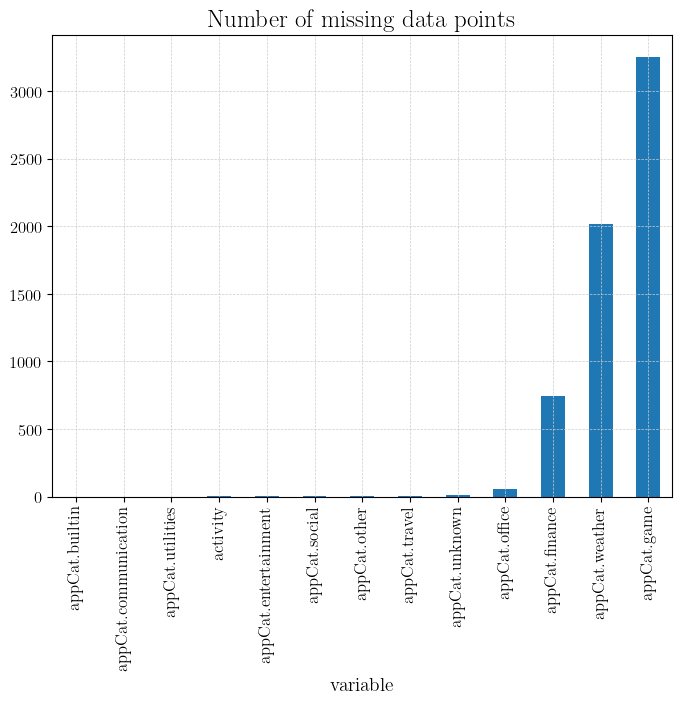

In [51]:
# Visualize the number of missing data points
missing = data_pivot.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot(kind='bar', title='Number of missing data points')
plt.show()

For the values here there a few missing points, we can use a sliding window to fill in the missing values
For the values where there are many value missing, these seem like varaibles where there they have mostly 0 values, so we can fill in the missing values with 0

In [52]:
for column in data_pivot.columns:
    # window sliding fill
    if 0 < data_pivot[column].isnull().sum() < 500:
        data_pivot[column][data_pivot[column].isnull()] = data_pivot[column].rolling(24, min_periods=1).mean()


data_pivot = data_pivot.fillna(0)

/tmp/ipykernel_31850/1895976420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot[column][data_pivot[column].isnull()] = data_pivot[column].rolling(24, min_periods=1).mean()
/tmp/ipykernel_31850/1895976420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pivot[column][data_pivot[column].isnull()] = data_pivot[column].rolling(24, min_periods=1).mean()
/tmp/ipykernel_31850/1895976420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

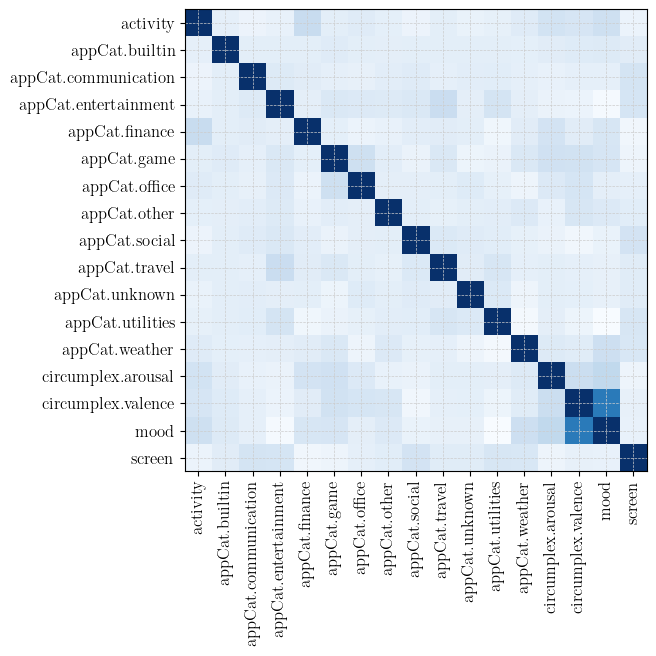

In [53]:
# get correlation matrix ignoring time and id

# numeric only
num_grouped = data_pivot.select_dtypes(include=[np.number])
# Drop call and sms variables
num_grouped = num_grouped.drop(columns=['call', 'sms'])
corr = num_grouped.corr()
plt.imshow(corr, cmap='Blues', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()